### Introduction to Stochastic Gradient Descent (SGD)

In the realm of machine learning, optimization techniques are essential for training models effectively. One of the most widely used optimization algorithms is **Stochastic Gradient Descent (SGD)**. SGD is an iterative optimization algorithm that updates the parameters (weights and biases) of the model to minimize the loss function, which represents the error between predicted values and actual target values.

SGD is particularly popular because it is computationally efficient and works well with large datasets. In this notebook, we will walk through the key concepts, mathematical formulas, and implementation of the **Stochastic Gradient Descent (SGD)** algorithm using Python, specifically focusing on a linear regression example.

---

### Key Concepts of SGD

1. **Objective:**
   - The goal of SGD is to minimize the **loss function**, which measures the discrepancy between predicted and true values.

2. **Loss Function:**
   - For regression tasks, we often use **Mean Squared Error (MSE)** as the loss function, which is defined as:
   $$
     \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
     where  $(y_i)$ is the true target value and  $(\hat{y}_i)$ is the predicted value. This measures the average squared difference between predicted and actual values.

3. **Gradient Descent:**
   - Gradient descent is an optimization technique that iteratively updates the parameters (weights and bias) of the model to minimize the loss function.
   - The parameters are updated in the direction of the negative gradient of the loss function with respect to each parameter.
   - The update rule for each parameter  $(\theta)$  $(weights and bias)$ is:
     $$
     \theta = \theta - \eta \frac{\partial \text{Loss}}{\partial \theta}
     $$
     where:
     -  $(\eta)$ is the **learning rate**, which controls the step size of the updates.
     -  $(\frac{\partial \text{Loss}}{\partial \theta})$ is the gradient of the loss function with respect to the parameter $(\theta)$.   $

4. **Stochastic Gradient Descent (SGD):**
   - In **SGD**, instead of computing the gradient over the entire dataset (which can be computationally expensive), we calculate the gradient for a **single training example** at a time.
   - This makes SGD faster and more efficient, especially for large datasets, but introduces more noise to the parameter updates.

---

### Algorithm Implementation of SGD for Linear Regression

#### Model Setup

In this implementation, we focus on linear regression, which is a simple yet powerful model used to predict continuous values. The linear regression model predicts a target value $(y)$ as a linear combination of the input features $(X)$:
$$
\hat{y} = X \cdot w + b
$$
where:
- $(X)$ is the input feature vector,
- $(w)$ is the weight vector, and
- $(b)$ is the bias term.

The objective of linear regression is to minimize the loss (MSE) between the predicted values \(\hat{y}\) and the actual target values $(y)$.

#### Formula for Gradients
To update the weights and bias, we need to compute the gradients of the loss function with respect to the weights and bias:

1. **Gradient of the loss with respect to weights $(w)$:**
   $$
   \frac{\partial \text{Loss}}{\partial w} = \frac{2}{n} X^T (X \cdot w + b - y)
   $$
   
2. **Gradient of the loss with respect to bias \(b\):**
   $$
   \frac{\partial \text{Loss}}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (X_i \cdot w + b - y_i)
   $$

However, in **Stochastic Gradient Descent**, instead of using all samples, we update parameters for each individual sample:
   
- **Update rule for each sample:**
   - For weights:
     $$
     w = w - \eta \cdot 2 X_i (X_i \cdot w + b - y_i)
     $$
   - For bias:
     $$
     b = b - \eta \cdot 2 (X_i \cdot w + b - y_i)
     $$

#### Code Implementation

Here is the implementation of SGD for linear regression in Python:


### Explanation of Code:

1. **Initialization:**
   - `learning_rate`: The step size for gradient updates.
   - `n_iterations`: The number of iterations the algorithm will run.
   - `weights`: The model parameters, initialized to zero.
   - `bias`: The bias term, initialized to zero.
   - `history`: A dictionary to store the loss, weights, and bias at each iteration for visualization purposes.

2. **`fit` Method:**
   - Initializes the weights and bias.
   - Iterates over the training data for the specified number of iterations.
   - For each training example, the gradient of the loss function is computed, and the parameters are updated accordingly.
   - The loss is computed and stored after each update to track the convergence of the algorithm.

3. **`predict` Method:**
   - This method uses the trained weights and bias to make predictions on new data.


In [17]:
import numpy as np

class StochasticGradientDescent:

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
        
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = y.reshape(-1)
        
        # Gradient descent
        for i in range(self.n_iterations):
            for i in range(X.shape[0]):
                
                # Calculate predictions
                y_predicted = np.dot(X[i], self.weights) + self.bias
                
                # Compute gradients
                dw = 2 * X[i] * (y_predicted - y[i])
                db = 2 * (y_predicted - y[i])
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                # Compute and store loss
                loss = np.mean((y_predicted - y[i]) ** 2)
                self.history['loss'].append(loss)
                self.history['weights'].append(self.weights.copy())
                self.history['bias'].append(self.bias)
                
                # Print progress every 100 iterations
            if (i + 1) % 100 == 0:
                print(f'Iteration {i + 1}/{self.n_iterations}, Loss: {loss:.4f}')
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [19]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

model = StochasticGradientDescent(learning_rate=0.01, n_iterations=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

45.611926685028216

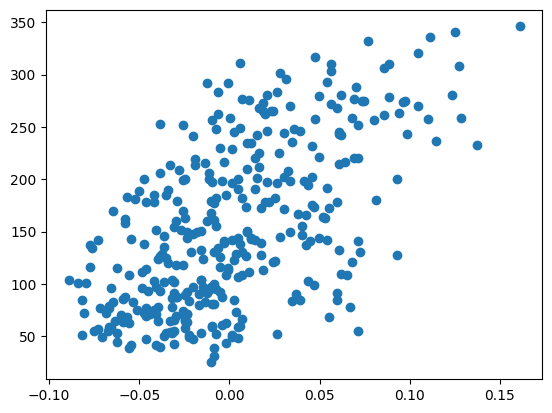

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 2], y_train)
plt.show()

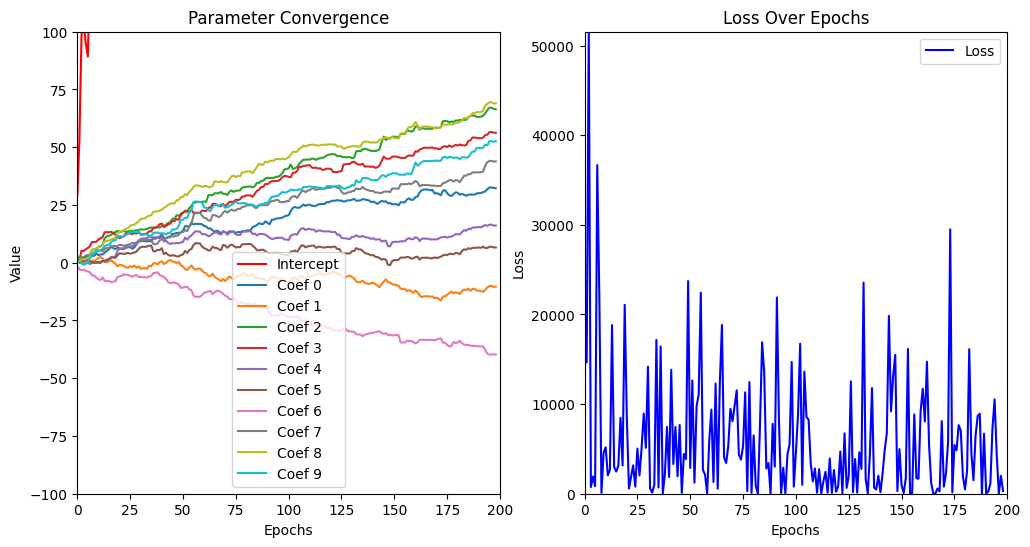

In [35]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Create and fit the model
model = StochasticGradientDescent(learning_rate=0.1, n_iterations=200)
model.fit(X_train, y_train)

# Animation Setup
history = model.history
epochs = model.n_iterations

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
intercept_line, = ax[0].plot([], [], 'r-', label="Intercept")
coef_lines = [ax[0].plot([], [], label=f"Coef {i}")[0] for i in range(X_train.shape[1])]
loss_line, = ax[1].plot([], [], 'b-', label="Loss")

# Set up axes
ax[0].set_xlim(0, epochs)
ax[0].set_ylim(-100, 100)
ax[0].set_title("Parameter Convergence")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Value")
ax[0].legend()

ax[1].set_xlim(0, epochs)
ax[1].set_ylim(0, max(history["loss"]))
ax[1].set_title("Loss Over Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

def update(frame):
    # Update intercept
    intercept_line.set_data(range(frame), history['bias'][:frame])
    
    # Update coefficients
    for i, coef_line in enumerate(coef_lines):
        coef_line.set_data(range(frame), [history['weights'][j][i] for j in range(frame)])
    
    # Update loss
    loss_line.set_data(range(frame), history["loss"][:frame])
    return [intercept_line] + coef_lines + [loss_line]

ani = FuncAnimation(fig, update, frames=epochs, interval=100, blit=True)
ani.save("sdg.gif", writer="pillow", fps=10)
plt.show()